In [1]:
#word2vec, glove ?

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from bs4 import BeautifulSoup
import re
from sklearn.naive_bayes import MultinomialNB

In [3]:
train = pd.read_csv('data/drugsComTrain_raw.csv')

In [4]:
test = pd.read_csv('data/drugsComTest_raw.csv')

## Drop missing values

In [5]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

## Create binned classes (Low, Medium, High)

In [6]:
#Low = 1-3 : class 1
#Medium = 4-6 : class 2
#High = 7-10 : class 3
def rate_class(rating):
    low = np.arange(1,4)
    med = np.arange(4,7)
    high = np.arange(7,11)
    
    if(rating in low):
        return 1
    elif(rating in med):
        return 2
    elif(rating in high):
        return 3
    else:
        return 'Error'

In [7]:
train['rating_class']=train['rating'].apply(rate_class)
test['rating_class']=test['rating'].apply(rate_class)

In [8]:
train = train[train['rating_class']!='Error']
test = test[test['rating_class']!='Error']

## Remove numbers from reviews

In [9]:
def remove_num(review):
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    return letters_only

In [10]:
train['review'] = train['review'].apply(remove_num)
test['review'] = test['review'].apply(remove_num)

## Visualize words

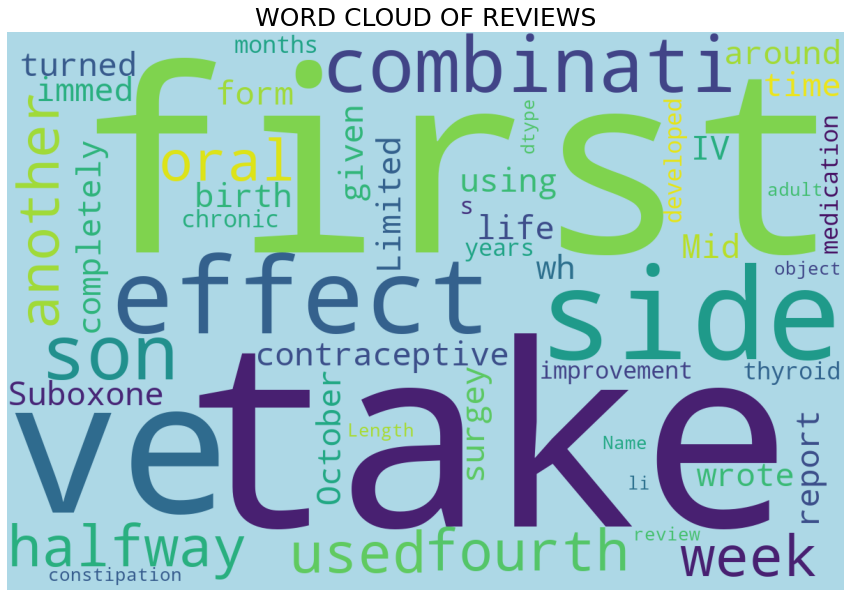

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)


wordcloud = WordCloud(background_color = 'lightblue', stopwords = stop_words, width = 1200, height = 800).generate(str(train['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Use TfidVectorizer to extract features from reviews

In [12]:
#Play around with 
# * ngram_range:
# (1,2) = unigrams and bigrams, removed=unigrams only, ngram_range=(2,2) is bigrams
# only. Higher n-grams can be helpful but can lead to overfitting and increases features a lot.
# * min_df = number of documents the word must appear in before it becomes a feature
# * stop words = some stop words are emotional words (e.g aren't). May want to include these
# * max_features = maximum number of features to extract based on word frequency

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,min_df=2,ngram_range=(1,3),max_features=20000).fit(train['review'].values)

print("Number of features: ", len(vect.get_feature_names()))

Number of features:  20000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Transform using tfid vector and create X_train,X_test,y_train,y_test

In [13]:
words_train = vect.transform(train['review'].values)
words_test = vect.transform(test['review'].values)

In [14]:
feature_names = vect.get_feature_names()

In [15]:
X_train = pd.DataFrame(words_train.toarray(), columns = feature_names)
X_test = pd.DataFrame(words_test.toarray(), columns = feature_names)

In [16]:
y_train = train['rating_class']
y_test = test['rating_class']

In [17]:
X_train

,aa,abdomen,abdominal,abdominal cramping,abdominal cramps,abdominal pain,abdominal pains,abilify,abilify mg,abilities,...,zomig,zone,zoned,zonegran,zovia,zovirax,zubsolv,zyban,zyprexa,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test

,aa,abdomen,abdominal,abdominal cramping,abdominal cramps,abdominal pain,abdominal pains,abilify,abilify mg,abilities,...,zomig,zone,zoned,zonegran,zovia,zovirax,zubsolv,zyban,zyprexa,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
words_train

<160398x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 6611000 stored elements in Compressed Sparse Row format>

In [67]:
#A feature?
train[train['review'].str.match('.*no side effect*.')==True]['rating'].mean()

8.5967845659164

## Test basic model

In [23]:
#Test various models
#play around with hyperparameters
#play around with classes. Binary classification vs 3 classes

In [22]:
#train the classifier
model = MultinomialNB(alpha = 0.5).fit(X=X_train, y=y_train)

print("Classification accuracy on training set: ", model.score(X_train, y_train))
print("Classification accuracy on testing set: ", model.score(X_test, y_test))

Classification accuracy on training set:  0.7696729385653188
Classification accuracy on testing set:  0.7551195975388528


In [24]:
y_pred_train = model.predict(X_train)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred_train, y_true=y_train, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.74      0.54      0.63     34848
           2       0.58      0.12      0.20     19240
           3       0.78      0.96      0.86    106310

    accuracy                           0.77    160398
   macro avg       0.70      0.54      0.56    160398
weighted avg       0.75      0.77      0.73    160398



In [26]:
y_pred_test = model.predict(X_test)

In [27]:
print(classification_report(y_pred=y_pred_test, y_true=y_test, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.72      0.50      0.59     11786
           2       0.49      0.09      0.16      6435
           3       0.77      0.96      0.85     35250

    accuracy                           0.76     53471
   macro avg       0.66      0.52      0.53     53471
weighted avg       0.72      0.76      0.71     53471

